In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [40]:
# Find the most recent date in the data set.
Recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
Recent_date

('2017-08-23',)

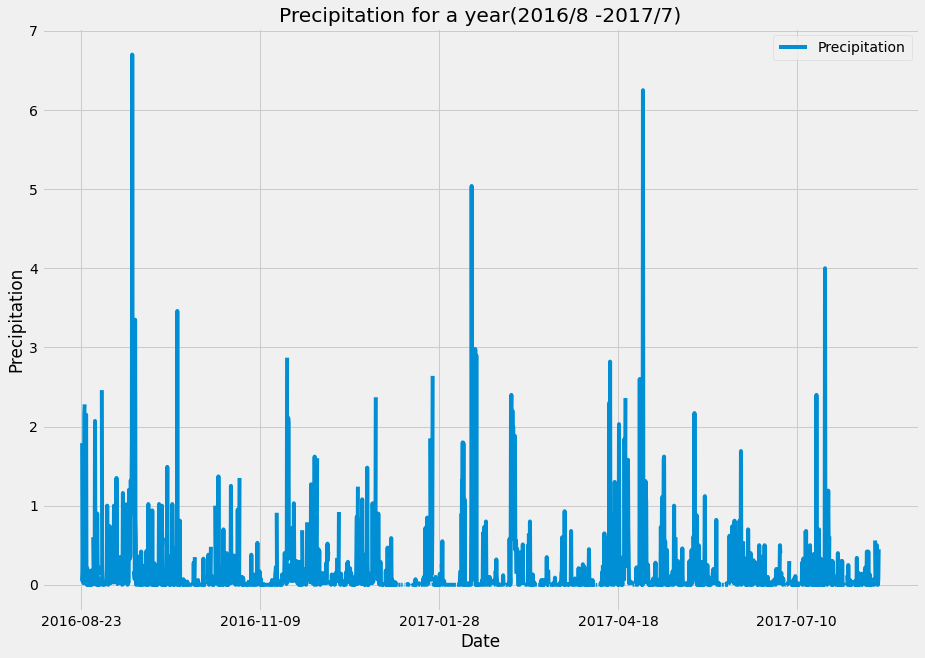

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
Recent_date = dt.date(2017,8, 23)

# Calculate the date one year from the last date in data set.
One_Year = Recent_date - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
Measurement_query = session.query(Measurement.date, Measurement.prcp).filter(func.strftime('%Y-%m-%d',Measurement.date) > One_Year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
Measurement_df = pd.DataFrame(Measurement_query,columns = ['Date', 'Precipitation'])
Measurement_df.set_index(Measurement_df['Date'],inplace = True)

# Sort the dataframe by date
SortedMeasurement_df = Measurement_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data

SortedMeasurement_df.plot(figsize = (14,10), legend = True, grid = True)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation for a year(2016/8 -2017/7)')
plt.show()

In [60]:
# Use Pandas to calcualte the summary statistics for the precipitation data
SortedMeasurement_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [62]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Most_ActiveStation = [Measurement.station, func.count(Measurement.station)]

Active_Station = session.query(*Most_ActiveStation).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first().station

session.query(*Most_ActiveStation).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Temperature_Num = [Measurement.station,
           func.min(Measurement.tobs),
           func.max(Measurement.tobs),
           func.avg(Measurement.tobs)]

Query= session.query(*Temperature_Num).filter_by(station = "USC00519281").all()
#print(f"{Query[0][0]}.")
#print(f"{Query[0][1]}.")
#print(f"{Query[0][2]}.")
#print(f"{Query[0][3]}.")

Text(0.5, 0, 'Temperature')

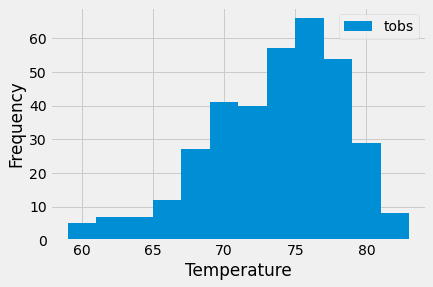

In [70]:
# Using the most active station id
Past_12Months = session.query(measurement.date, measurement.tobs).filter_by(station = "USC00519281").filter(measurement.date >= One_Year).all()
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Past_12Months_df = pd.DataFrame(Past_12Months)

Past_12Months_df.plot.hist(bins = 12)
plt.xlabel('Temperature')

# Close session

In [ ]:
# Close Session
session.close()